# Importing libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#Import for preprocessing
from sklearn.preprocessing import LabelEncoder
import re    # regular expression(scaning of text)
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer,LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [2]:
df1=pd.read_csv('Fast_X_comments.csv')
df1.head()

,Review
0,"Guys,remember it started off with a piece of b..."
1,I loved the part when it is revealed that Dom ...
2,BRAİN OCANNER didn't want it to be like this
3,Stupid movies for stupid people.
4,"I just watch the whole thing, this is already ..."


In [3]:
df1.shape

(306, 1)

In [4]:
df1.isnull().sum()

Review    0
dtype: int64

In [5]:
#nltk.download('vader_lexicon')

# Labelling the Data using Vader

In [6]:
sentiments=SentimentIntensityAnalyzer()
df1['Positive']=[sentiments.polarity_scores(i)['pos'] for i in df1['Review']]
df1['Negative']=[sentiments.polarity_scores(i)['neg'] for i in df1['Review']]
df1['Neutral']=[sentiments.polarity_scores(i)['neu'] for i in df1['Review']]
df1['Compound']=[sentiments.polarity_scores(i)['compound'] for i in df1['Review']]
score=df1['Compound'].values
sentiment=[]
for i in score :
    if i>= 0.5:
        sentiment.append('Positive')
    elif i<=-0.5:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df1['Sentiment']=sentiment
df1.head()

,Review,Positive,Negative,Neutral,Compound,Sentiment
0,"Guys,remember it started off with a piece of b...",0.000,0.000,1.000,0.0000,Neutral
1,I loved the part when it is revealed that Dom ...,0.193,0.000,0.807,0.8316,Positive
2,BRAİN OCANNER didn't want it to be like this,0.233,0.114,0.653,0.3134,Neutral
3,Stupid movies for stupid people.,0.000,0.694,0.306,-0.7783,Negative
4,"I just watch the whole thing, this is already ...",0.000,0.000,1.000,0.0000,Neutral


In [7]:
df1['Sentiment'].value_counts()

Neutral     183
Positive     75
Negative     48
Name: Sentiment, dtype: int64

In [8]:
  df=df1.drop(columns=['Positive','Negative','Neutral','Compound'],axis=1)

In [9]:
df

,Review,Sentiment
0,"Guys,remember it started off with a piece of b...",Neutral
1,I loved the part when it is revealed that Dom ...,Positive
2,BRAİN OCANNER didn't want it to be like this,Neutral
3,Stupid movies for stupid people.,Negative
4,"I just watch the whole thing, this is already ...",Neutral
...,...,...
301,Why dom son come black,Neutral
302,Can change the tittle of the name to : Luck & ...,Neutral
303,They have 2 actors from game of thrones and be...,Neutral
304,Do I understand this correctly that this movie...,Neutral


# Plotting the Data

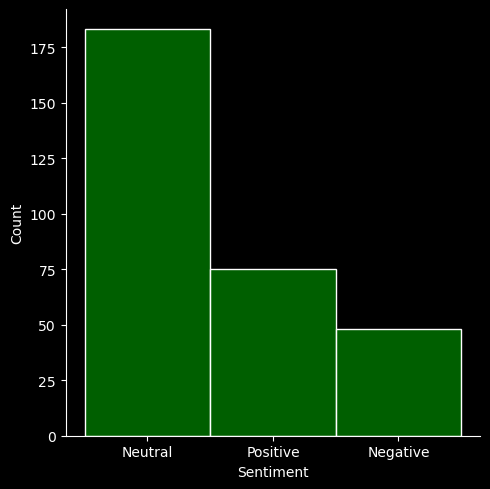

In [10]:
plt.style.use('dark_background')
sns.displot(df['Sentiment'],color='g')
#seems like people like the Fast X trailer :)

<Axes: >

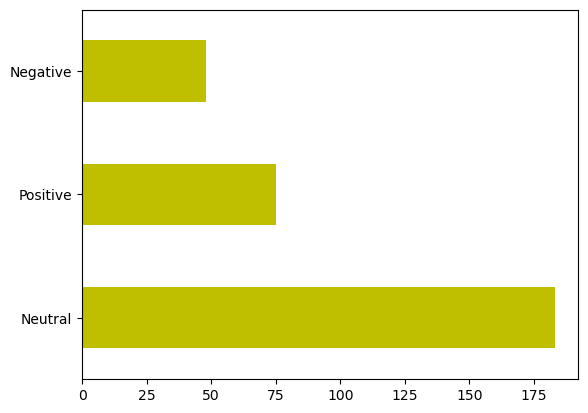

In [11]:
plt.style.use('default')
df['Sentiment'].value_counts().plot.barh(color='y')

# Text Pre-processing using Lemmatization

In [12]:
stop_words=stopwords.words('english')
porter_stemmer=PorterStemmer()
lancaster_stemmer=LancasterStemmer()
snowball_stemmer=SnowballStemmer(language='english')
lzr=WordNetLemmatizer()

In [13]:
def lemmatizing(data):
    lem_data=re.sub('[^a-zA-Z]',' ',data)
    lem_data=re.sub(r'\s+',' ',lem_data)
    lem_data=lem_data.lower()
    lem_data=lem_data.split()
    lem_data=[lzr.lemmatize(word) for word in lem_data if not word in stop_words]
    lem_data =' '.join(lem_data)
    return lem_data

In [14]:
df['Review']=df['Review'].apply(lemmatizing)

In [15]:
df.head()

,Review,Sentiment
0,guy remember started piece bread tuna,Neutral
1,loved part revealed dom actually possessed rea...,Positive
2,bra n ocanner want like,Neutral
3,stupid movie stupid people,Negative
4,watch whole thing already th sequel already st...,Neutral


In [16]:
le=LabelEncoder()
df['Sentiment']=le.fit_transform(df['Sentiment'])
df.head()

,Review,Sentiment
0,guy remember started piece bread tuna,1
1,loved part revealed dom actually possessed rea...,2
2,bra n ocanner want like,1
3,stupid movie stupid people,0
4,watch whole thing already th sequel already st...,1


<Axes: >

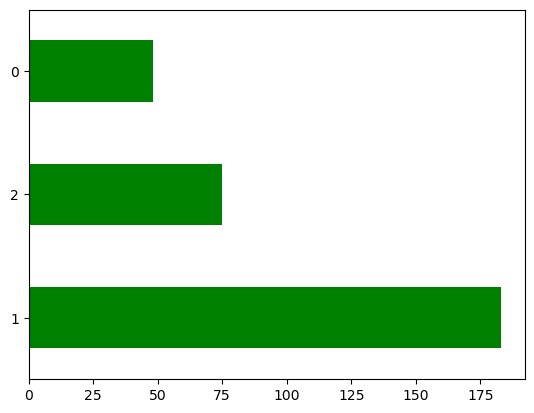

In [17]:
plt.style.use('default')
df['Sentiment'].value_counts().plot.barh(color='g')

# here the data is imbalanced so have to do sampling of the data to make model performance better

In [18]:
df_neutral=df[df['Sentiment']==1]
df_negative=df[df['Sentiment']==0]
df_positive=df[df['Sentiment']==2]
df_negative_upsam=resample(df_negative,replace=True,n_samples=183,random_state=42)
df_postive_upsam=resample(df_positive,replace=True,n_samples=183,random_state=42)
final_df=pd.concat([df_negative_upsam,df_postive_upsam,df_neutral])

In [19]:
final_df['Sentiment'].value_counts()

0    183
2    183
1    183
Name: Sentiment, dtype: int64

In [21]:
l=[]
for sentence in final_df['Review']:
    l.append(sentence)
l[0:10]    

['garbage seen weirdo guy acting like lady painting nail nothing story take son waste money',
 'crazy mentioned defeated law god first movie use pray eating crazy everything moving nowadays yea movie suck except first',
 'literally got home watching fast x loved hated fact show picture would impossible film picture show see character see make sense also one thing hated see credit going say wanna spoil people',
 'hated jason movie actually think killed made sense except acted presented fairly child oversized sexual character need med hated trying worst johnny dep impression ever seen call waste personal time really think jason ruined movie',
 'hated jason movie actually think killed made sense except acted presented fairly child oversized sexual character need med hated trying worst johnny dep impression ever seen call waste personal time really think jason ruined movie',
 'bad movie waste time',
 'garbage seen weirdo guy acting like lady painting nail nothing story take son waste money

In [29]:
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(l).toarray()
y=final_df['Sentiment'].values

<class 'numpy.ndarray'>


In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

# Evaluation 

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0],
       [ 4, 35,  1],
       [ 4,  0, 33]], dtype=int64)

In [33]:
nb_score=accuracy_score(y_test,y_pred)
print('The Model has Accuracy of:',nb_score)

The Model has Accuracy of: 0.9181818181818182
